# Capstone Project
### DATA 606, Spring 2022, Dr. Chaojie Wang

#### Description: This notebook represents initial Exploratory Data Analysis.  This explores 12 months of the New York City BikeShare trip data (from February 2021 through January 2022) to get an understanding of the data through summarizing and charting. 

## Function Definitions & Setup
This section deals with imports and function definitions

In [24]:
import pandas as pd
pd.__version__

'1.3.5'

In [25]:
import shapely

In [26]:
from matplotlib import pyplot as plt

In [27]:
import numpy as np

In [28]:
import glob

In [29]:
import os
from os.path import join, isdir
from os import mkdir, path

In [30]:
import datetime

In [31]:
import shapely as s
s.__version__

'1.8.1.post1'

<br><br>

### Combine NYC Bike Share data that is in separate csv files by month into dataframe

In [32]:
os.getcwd()

'/Users/DF/Library/CloudStorage/OneDrive-Personal/Documents/Grad School-David’s MacBook Pro/Spring 2022 - Capstone/JupyterNB'

In [33]:
os.chdir('/Users/DF/Library/CloudStorage/OneDrive-Personal/Documents/Grad School-David’s MacBook Pro/Spring 2022 - Capstone/JupyterNB')

In [34]:
os.chdir('NYCData')

#### Load all csv files into the df dataframe

In [35]:
filenames = [i for i in glob.glob('*.{}'.format('csv'))]

In [36]:
print(filenames)

['202105-citibike-tripdata.csv', '202201-citibike-tripdata.csv', '202107-citibike-tripdata.csv', '202111-citibike-tripdata.csv', '202109-citibike-tripdata.csv', '202103-citibike-tripdata.csv', '202112-citibike-tripdata.csv', '202104-citibike-tripdata.csv', '202110-citibike-tripdata.csv', '202106-citibike-tripdata.csv', '202108-citibike-tripdata.csv', '202102-citibike-tripdata.csv']


In [37]:
df = pd.concat([pd.read_csv(f, low_memory=False) for f in filenames ])

In [38]:
# View data
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E12103A91226099A,docked_bike,2021-05-06 17:25:01,2021-05-06 17:45:25,Broadway & W 60 St,6948.11,1 Ave & E 78 St,7020.09,40.769155,-73.981918,40.771404,-73.953517,member
1,26A3DC47FE0EA3A3,docked_bike,2021-05-13 12:48:08,2021-05-13 13:07:37,Broadway & W 25 St,6173.08,E 2 St & Avenue B,5515.02,40.742868,-73.989186,40.722174,-73.983688,member
2,A99F2E1D627B088F,docked_bike,2021-05-16 08:30:13,2021-05-16 08:45:47,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member
3,43E79A45997B7390,docked_bike,2021-05-01 08:38:14,2021-05-01 08:54:27,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member
4,8B3CC649F4F58816,docked_bike,2021-05-09 08:12:31,2021-05-09 08:27:05,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member


In [39]:
# How many rows and columns
print('rows:', df.shape[0])
print('columns:', df.shape[1])

rows: 27616822
columns: 13


<br><br>

## Clean and prepare the data

#### Look at the data field types

In [40]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [41]:
# Convert date/times
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at']   = pd.to_datetime(df['ended_at'])

#### Check for null values

In [42]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name       492
start_station_id         492
end_station_name      103800
end_station_id        103800
start_lat                  0
start_lng                  0
end_lat                65401
end_lng                65401
member_casual              0
dtype: int64

#### Based on the above, we have a small portion of nulls in the station names (100 thousand rows out of 27.6 million)

In [43]:
# fill null numeric columns with the value 0
df[['end_lat','end_lng']] = df[['end_lat','end_lng']].fillna(value=0)

In [44]:
# fill null string columns with the ''
df[['start_station_name','start_station_id','end_station_name','end_station_id']] = \
     df[['start_station_name','start_station_id','end_station_name','end_station_id']].fillna(value='')

In [45]:
# Recheck to be sure we have addressed the nulls
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

#### Let's add separate columns for Month#, Year, Hour for further analysis

In [46]:
df['year']  = pd.DatetimeIndex(df['started_at']).year
df['month'] = pd.DatetimeIndex(df['started_at']).month
df['year-month'] = df['started_at'].dt.strftime('%Y-%m')
df['hour_of_day'] = pd.DatetimeIndex(df['started_at']).hour

#### Group by month to see the trips per month over time

In [47]:
# Group the results by month
df_bymonth = df.groupby(['year-month']).agg({'ride_id': 'count'}).copy().reset_index()

# Rename to be "count"
df_bymonth.rename(columns={'ride_id':'#trips'}, inplace=True)

In [48]:
df_bymonth.head(12)

,year-month,#trips
0,2021-02,649983
1,2021-03,1531094
2,2021-04,2067669
3,2021-05,2724165
4,2021-06,3177517
5,2021-07,3084537
6,2021-08,3072478
7,2021-09,3280221
8,2021-10,3069239
9,2021-11,2159283


<Figure size 432x288 with 0 Axes>

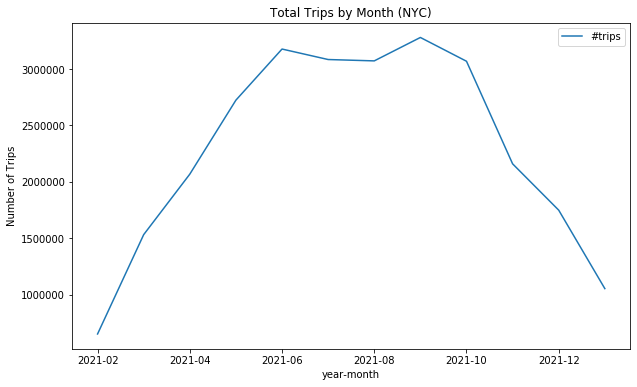

In [61]:
heading = 'Total Trips by Month (NYC)'

plt.figure()
ax = df_bymonth.plot.line(stacked=False, x='year-month', figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')
    
# Display to screen
plt.show()

### Let's now group by start station
#### We'll get the count and one lat/long per start station to be able to plot on a map

In [50]:
grp = df.groupby(['start_station_name'])

df_bystation = grp.agg({'ride_id': 'count', 'start_lat': 'max', 'start_lng': 'min'}).copy().reset_index()

# Rename to be "count"
df_bystation.rename(columns={'ride_id':'#trips'}, inplace=True)

In [51]:
df_bystation.head(10)

,start_station_name,#trips,start_lat,start_lng
0,,492,40.760000,-74.010000
1,1 Ave & E 110 St,20827,40.792327,-73.938300
2,1 Ave & E 16 St,82693,40.732219,-73.985302
3,1 Ave & E 18 St,69735,40.733812,-73.980544
4,1 Ave & E 30 St,46177,40.741444,-73.976806
5,1 Ave & E 39 St,62874,40.747140,-73.971130
6,1 Ave & E 44 St,29151,40.750020,-73.969053
7,1 Ave & E 5 St,6658,40.725864,-73.986389
8,1 Ave & E 6 St,55022,40.726331,-73.986169
9,1 Ave & E 62 St,63140,40.761227,-73.960940


#### How many stations are there?

In [52]:
df_bystation.shape

(1586, 4)

#### What are the top stations?

In [53]:
df_bystation.nlargest(20,'#trips')

,start_station_name,#trips,start_lat,start_lng
1429,W 21 St & 6 Ave,128542,40.741740,-73.994156
679,E 17 St & Broadway,122854,40.740259,-73.997249
10,1 Ave & E 68 St,110955,40.765005,-73.958185
1549,West St & Chambers St,109129,40.717548,-74.013221
418,Broadway & W 25 St,101411,40.742869,-73.989186
514,Cleveland Pl & Spring St,101008,40.722104,-74.005524
395,Broadway & E 14 St,98920,40.734592,-73.990787
249,6 Ave & W 33 St,96432,40.750200,-73.990931
636,E 13 St & Avenue A,94655,40.729667,-73.980680
1550,West St & Liberty St,94489,40.711444,-74.014847


### Summarize by Rideable Type

In [63]:
df_bytype = df.groupby(['rideable_type']).agg({'ride_id': 'count'}).copy().reset_index()

df_bytype.rename(columns={'ride_id':'#trips'}, inplace=True)

In [64]:
df_bytype.head(100)

,rideable_type,#trips
0,classic_bike,18432181
1,docked_bike,9184134
2,electric_bike,507


<Figure size 432x288 with 0 Axes>

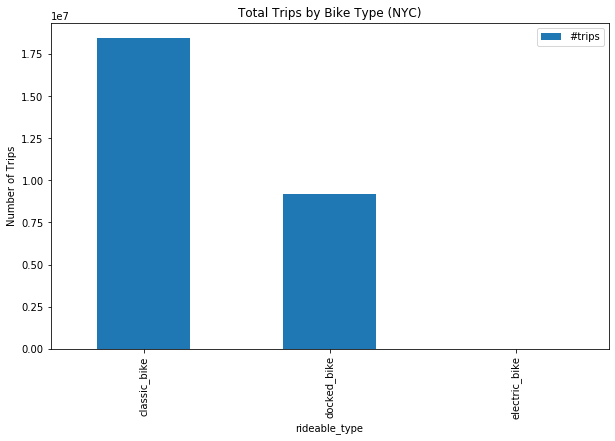

In [70]:
heading = 'Total Trips by Bike Type (NYC)'

plt.figure()
ax = df_bytype.plot.bar(stacked=False, x='rideable_type', figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')
    
plt.show()

### Summarize by Member Type

In [66]:
df_bymembertype = df.groupby(['member_casual']).agg({'ride_id': 'count'}).copy().reset_index()

df_bymembertype.rename(columns={'ride_id':'#trips'}, inplace=True)

<Figure size 432x288 with 0 Axes>

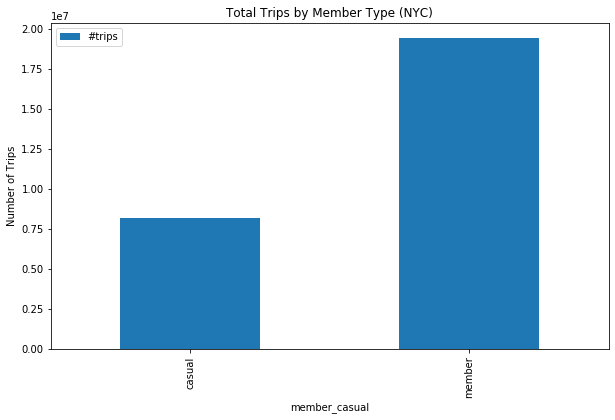

In [73]:
heading = 'Total Trips by Member Type (NYC)'

plt.figure()
ax = df_bymembertype.plot.bar(stacked=False, x='member_casual', y='#trips', figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')

plt.show()